<a href="https://colab.research.google.com/github/Verne1321/Portfolio/blob/main/Coding_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Sample - Soccer Data
In the realm of football (soccer), the impact of red cards is often debated. While receiving a red card means that a player from the team has been sent off and cannot be replaced, leading to a numeric disadvantage on the field, the exact impact of this on a team's probability of winning is not definitively quantified.

The goal of this analysis is to determine whether there's a significant relationship between the number of red cards a team receives and its probability of winning a game. We will be using historical match data which provides detailed statistics for each game, including the number of red cards each team received.

Our approach involves:

Cleaning the data to ensure it's ready for analysis.
Manipulating the data to aggregate relevant metrics.
Conducting an analysis to uncover insights regarding the relationship between red cards and match outcomes.
By the end of this project, we aim to have a clearer understanding of the role red cards play in determining match outcomes.



In [ ]:
# Import libraries then load and view dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Verne1321/Portfolio/main/soccer18-19.csv"
df = pd.read_csv(url)
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0


## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |


[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

# Preliminary Data Exploration
This initial exploration will inform the subsequent data cleaning steps, ensuring we address all the potential issues that may arise.

In [ ]:
# Review the data types of each column
print("\nData Types:\n",df.dtypes)

# High-level statistical summary on numerical columns:
print("\nStatistical Summary:\n", df.describe())


Data Types:
 Div         object
Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
Referee     object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

Statistical Summary:
              FTHG        FTAG        HTHG  ...          AY          HR          AR
count  380.000000  380.000000  380.000000  ...  380.000000  380.000000  380.000000
mean     1.568421    1.252632    0.678947  ...    1.684211    0.047368    0.076316
std      1.312836    1.180031    0.860802  ...    1.209140    0.212706    0.275599
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      1.000000    0.000000    0.000000  ...    1.000000    0.000000    0.000000
50%      1.000

## Data Cleaning
The following code will ensure that the dataset is anomaly free and correctly structured for analysis.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

if missing_values.any():
    print("There are missing values in the dataset:\n", missing_values)
else:
    print("There are no missing values in the dataset.")

# Check that numerical columns have the correct data type

cols_to_convert = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
for col in cols_to_convert:
    df[col] = df[col].astype(int)

# Filter relevant columns
relevant_cols = ['HomeTeam', 'AwayTeam', 'FTR', 'HR', 'AR']
df = df[relevant_cols]

There are no missing values in the dataset.


## Data Manipulation
The main objective of this code is to determine the effects of red cards on the probability of a team winning.

In [ ]:
# Use a function to determine the outcome of home and away teams

def match_outcome(row):
    if row['FTR'] == 'H':
        return 'Home Win'
    elif row['FTR'] == 'A':
        return 'Away Win'
    else:
        return 'Draw'

df['Outcome'] = df.apply(match_outcome, axis=1)
print(df.head())

       HomeTeam        AwayTeam FTR  HR  AR   Outcome
0    Man United       Leicester   H   0   0  Home Win
1   Bournemouth         Cardiff   H   0   0  Home Win
2        Fulham  Crystal Palace   A   0   0  Away Win
3  Huddersfield         Chelsea   A   0   0  Away Win
4     Newcastle       Tottenham   A   0   0  Away Win


In [ ]:
# Aggregate the red card data by grouping the data by teams, number of red cards received and match outcome to get the frequency of each combination.

# For the home team
home_df = df.groupby(['HomeTeam', 'HR', 'Outcome']).size().reset_index(name='HomeCount')

# For the away team
away_df = df.groupby(['AwayTeam', 'AR', 'Outcome']).size().reset_index(name='AwayCount')

## Data Analysis
The following code will help to build understanding of the relationship between receiving red cards and the probability of winning a match.

In [ ]:
# Calculate the probability of winning given red cards

# For home teams
home_df['WinPercentage'] = home_df.apply(lambda row: (row['HomeCount'] / home_df[home_df['HomeTeam'] == row['HomeTeam']]['HomeCount'].sum()) * 100 if row['Outcome'] == 'Home Win' else 0, axis=1)

# For away teams
away_df['WinPercentage'] = away_df.apply(lambda row: (row['AwayCount'] / away_df[away_df['AwayTeam'] == row['AwayTeam']]['AwayCount'].sum()) * 100 if row['Outcome'] == 'Away Win' else 0, axis=1)

## Visualizing the data

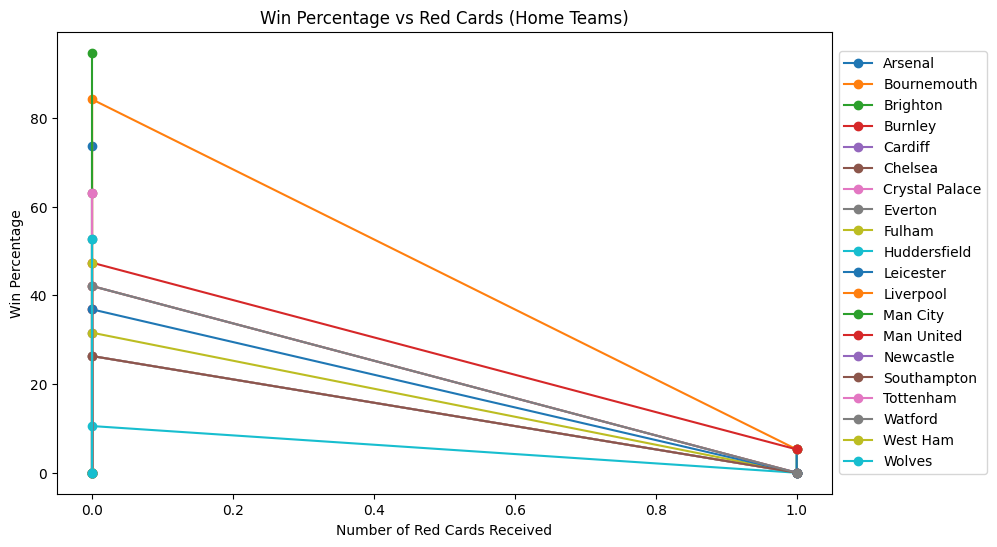

In [ ]:
# Plotting for home teams
plt.figure(figsize=(10,6))
for team in home_df['HomeTeam'].unique():
    subset = home_df[home_df['HomeTeam'] == team]
    plt.plot(subset['HR'], subset['WinPercentage'], marker='o', label=team)
plt.xlabel('Number of Red Cards Received')
plt.ylabel('Win Percentage')
plt.title('Win Percentage vs Red Cards (Home Teams)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

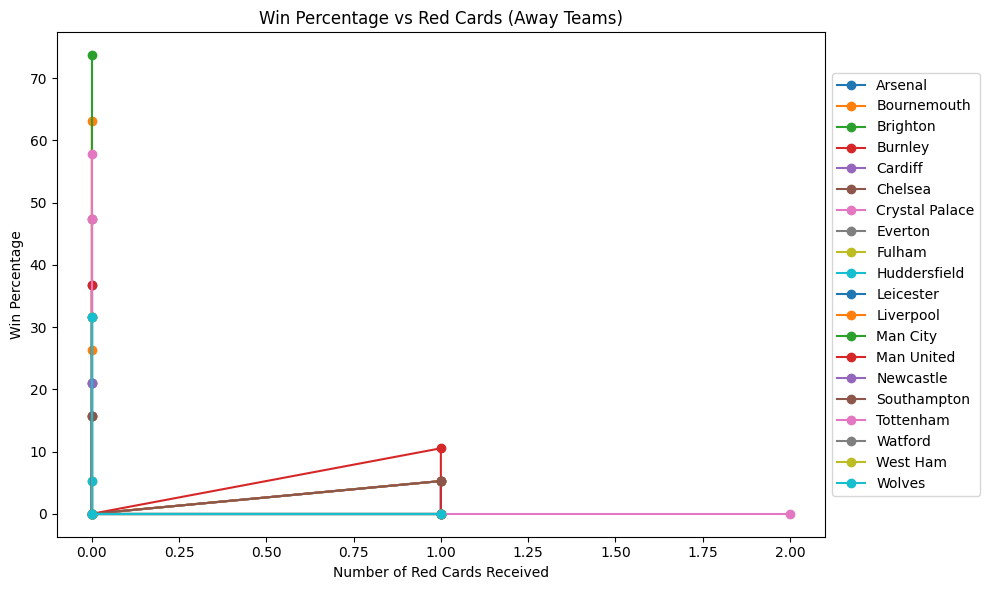

In [ ]:
# Plotting for away teams
plt.figure(figsize=(10,6))
for team in away_df['AwayTeam'].unique():
    subset = away_df[away_df['AwayTeam'] == team]
    plt.plot(subset['AR'], subset['WinPercentage'], marker='o', label=team)
plt.xlabel('Number of Red Cards Received')
plt.ylabel('Win Percentage')
plt.title('Win Percentage vs Red Cards (Away Teams)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Conclusion

The plots show that the win percentage for different teams, both home and away, varies with the number of red cards received. If red cards had a considerable impact on the chances of winning, we would expect to see a trend where the win percentages decrease as the number of red cards issued increases.